<a href="https://colab.research.google.com/github/rishiwalia08/FINANCIAL-TIME-SERIES-SIGNAL-EXTRACTION-USIING-ML/blob/main/P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstal

In [66]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#$stock=input("Enter the stock ")
stock="^NSEI"
ndf=yf.download(stock,start="2013-01-01")

/tmp/ipython-input-2086665198.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ndf=yf.download(stock,start="2013-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
ndf.head()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2013-01-02,5993.250000,6006.049805,5982.000000,5982.600098,0
2013-01-03,6009.500000,6017.000000,5986.549805,6015.799805,0
2013-01-04,6016.149902,6020.750000,5981.549805,6011.950195,0
2013-01-07,5988.399902,6042.149902,5977.149902,6042.149902,0
2013-01-08,6001.700195,6007.049805,5964.399902,5983.450195,0


In [4]:
ivix=yf.download("^INDIAVIX",start="2025-01-01")
ivix.head()

/tmp/ipython-input-1780637806.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ivix=yf.download("^INDIAVIX",start="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^INDIAVIX,^INDIAVIX,^INDIAVIX,^INDIAVIX,^INDIAVIX
Date,,,,,
2025-01-02,13.74,14.80,13.63,14.51,0
2025-01-03,13.54,13.98,13.23,13.74,0
2025-01-06,15.65,15.92,13.54,13.54,0
2025-01-07,14.66,15.65,14.35,15.65,0
2025-01-08,14.47,14.88,14.10,14.66,0


In [5]:
ivix=ivix[["Close"]]
ivix.rename(columns={"Close":"India VIX"},inplace=True)
ivix.head()

Price,India VIX
Ticker,^INDIAVIX
Date,
2025-01-02,13.74
2025-01-03,13.54
2025-01-06,15.65
2025-01-07,14.66
2025-01-08,14.47


In [6]:
df=ndf.join(ivix,how="inner")
df.dropna()
df.head()


Price,Close,High,Low,Open,Volume,India VIX
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX
Date,,,,,,
2025-01-02,24188.650391,24226.699219,23751.550781,23783.000000,283200,13.74
2025-01-03,24004.750000,24196.449219,23976.000000,24196.400391,312300,13.54
2025-01-06,23616.050781,24089.949219,23551.900391,24045.800781,278100,15.65
2025-01-07,23707.900391,23795.199219,23637.800781,23679.900391,262300,14.66
2025-01-08,23688.949219,23751.849609,23496.150391,23746.650391,266400,14.47


In [7]:
df["log-return"]=np.log(df["Close"]/df["Close"].shift(1))
df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,India VIX,log-return
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX,
Date,,,,,,,
2025-01-02,24188.650391,24226.699219,23751.550781,23783.000000,283200,13.74,NaN
2025-01-03,24004.750000,24196.449219,23976.000000,24196.400391,312300,13.54,-0.007632
2025-01-06,23616.050781,24089.949219,23551.900391,24045.800781,278100,15.65,-0.016325
2025-01-07,23707.900391,23795.199219,23637.800781,23679.900391,262300,14.66,0.003882
2025-01-08,23688.949219,23751.849609,23496.150391,23746.650391,266400,14.47,-0.000800


In [8]:
window=[20,50,100]
for i in window:
    df[f'Rolling Mean{i}']=df["log-return"].rolling(i).mean()
    df[f'Rolling Std{i}']=df["log-return"].rolling(i).std()
    df[f'Rolling Normalization{i}']=(df["log-return"]-df[f"Rolling Mean{i}"])/df[f"Rolling Std{i}"]

In [9]:
df.tail()

Price,Close,High,Low,Open,Volume,India VIX,log-return,Rolling Mean20,Rolling Std20,Rolling Normalization20,Rolling Mean50,Rolling Std50,Rolling Normalization50,Rolling Mean100,Rolling Std100,Rolling Normalization100
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-12-26,26042.300781,26144.199219,26008.599609,26121.250000,142200,9.1500,-0.003825,-0.000332,0.004570,-0.764455,0.000701,0.004894,-0.924778,0.000502,0.005084,-0.850949
2025-12-29,25942.099609,26106.800781,25920.300781,26063.349609,234300,9.7200,-0.003855,-0.000500,0.004637,-0.723443,0.000483,0.004848,-0.894789,0.000545,0.005027,-0.875373
2025-12-30,25938.849609,25976.750000,25878.000000,25940.900391,396900,9.6800,-0.000125,-0.000455,0.004636,0.071026,0.000274,0.004637,-0.086208,0.000480,0.004992,-0.121276
2025-12-31,26129.599609,26187.949219,25969.000000,25971.050781,246300,9.4800,0.007327,0.000187,0.004786,1.491789,0.000324,0.004700,1.490083,0.000583,0.005027,1.341606
2026-01-02,26304.550781,26312.400391,26118.400391,26155.099609,0,9.4525,0.006673,0.000609,0.004973,1.219335,0.000354,0.004736,1.334297,0.000680,0.005050,1.186779


In [10]:
df.dropna(inplace=True)
df.head()

Price,Close,High,Low,Open,Volume,India VIX,log-return,Rolling Mean20,Rolling Std20,Rolling Normalization20,Rolling Mean50,Rolling Std50,Rolling Normalization50,Rolling Mean100,Rolling Std100,Rolling Normalization100
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-06-02,24716.599609,24754.400391,24526.150391,24669.699219,311100,17.160000,-0.001379,0.000519,0.011379,-0.166807,0.001871,0.011495,-0.282729,0.000216,0.009716,-0.164117
2025-06-03,24542.500000,24845.099609,24502.150391,24786.300781,349300,16.559999,-0.007069,0.000333,0.011476,-0.644983,0.001443,0.011420,-0.745354,0.000222,0.009712,-0.750668
2025-06-04,24620.199219,24644.250000,24530.449219,24560.449219,280900,15.750000,0.003161,0.000420,0.011491,0.238550,0.001442,0.011419,0.150527,0.000416,0.009571,0.286755
2025-06-05,24750.900391,24899.849609,24613.099609,24691.199219,388400,15.080000,0.005295,0.000973,0.011444,0.377633,0.001302,0.011326,0.352485,0.000431,0.009577,0.507892
2025-06-06,25003.050781,25029.500000,24671.449219,24748.699219,335600,14.630000,0.010136,0.002031,0.011253,0.720271,0.001368,0.011369,0.771274,0.000540,0.009625,0.996975


In [11]:
def adf_test(series,name):
  result=adfuller(series.dropna())
  print(f'ADF TEST FOR {name}')
  print(f'ADF Stattistic :{result[0]:.4f}')
  print(f"p-value :{result[1]:.4f}")
  if(result[1]<0.05):
    print("Result :Stationary (Reject H0)")
  else:
    print("Result : Non-Stationary (Fail to reject H0)")

In [12]:
adf_test(df["Close"],"Nifty vlose ")


ADF TEST FOR Nifty vlose 
ADF Stattistic :-0.7957
p-value :0.8204
Result : Non-Stationary (Fail to reject H0)


In [13]:
adf_test(df["log-return"],"log return")

ADF TEST FOR log return
ADF Stattistic :-5.2545
p-value :0.0000
Result :Stationary (Reject H0)


In [14]:
if isinstance(df.columns,pd.MultiIndex):
  df.columns =df.columns.get_level_values(0)

In [15]:
df.ta.rsi(lenght =14,append=True)
df["RSI_14"].head()

,RSI_14
Date,
2025-06-02,NaN
2025-06-03,0.000000
2025-06-04,3.319069
2025-06-05,8.802433
2025-06-06,18.415833


In [16]:
df.ta.macd(append=True)
df["macd"]=df["MACD_12_26_9"]
df["macd_signal"]=df["MACDs_12_26_9"]
df["macd_hist"]=df["MACDh_12_26_9"]
df.tail()

Price,Close,High,Low,Open,Volume,India VIX,log-return,Rolling Mean20,Rolling Std20,Rolling Normalization20,...,Rolling Mean100,Rolling Std100,Rolling Normalization100,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd,macd_signal,macd_hist
Date,,,,,,,,,,,,,,,,,,,,,
2025-12-26,26042.300781,26144.199219,26008.599609,26121.250000,142200,9.1500,-0.003825,-0.000332,0.004570,-0.764455,...,0.000502,0.005084,-0.850949,52.964449,52.110954,5.130982,46.979972,52.110954,46.979972,5.130982
2025-12-29,25942.099609,26106.800781,25920.300781,26063.349609,234300,9.7200,-0.003855,-0.000500,0.004637,-0.723443,...,0.000545,0.005027,-0.875373,49.057667,41.664007,-4.252772,45.916779,41.664007,45.916779,-4.252772
2025-12-30,25938.849609,25976.750000,25878.000000,25940.900391,396900,9.6800,-0.000125,-0.000455,0.004636,0.071026,...,0.000480,0.004992,-0.121276,48.931595,32.745015,-10.537411,43.282426,32.745015,43.282426,-10.537411
2025-12-31,26129.599609,26187.949219,25969.000000,25971.050781,246300,9.4800,0.007327,0.000187,0.004786,1.491789,...,0.000583,0.005027,1.341606,56.067714,40.600562,-2.145492,42.746053,40.600562,42.746053,-2.145492
2026-01-02,26304.550781,26312.400391,26118.400391,26155.099609,0,9.4525,0.006673,0.000609,0.004973,1.219335,...,0.000680,0.005050,1.186779,61.395909,60.248727,14.002139,46.246588,60.248727,46.246588,14.002139


In [17]:
df.isnull().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
India VIX,0
log-return,0
Rolling Mean20,0
Rolling Std20,0


In [18]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'India VIX', 'log-return',
       'Rolling Mean20', 'Rolling Std20', 'Rolling Normalization20',
       'Rolling Mean50', 'Rolling Std50', 'Rolling Normalization50',
       'Rolling Mean100', 'Rolling Std100', 'Rolling Normalization100',
       'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'macd',
       'macd_signal', 'macd_hist'],
      dtype='object', name='Price')

In [19]:
df.ta.bbands(length=20,append=True)
bb_upper=[c for c in df.columns if c.startswith("BBU")][0]
bb_middle=[c for c in df.columns if c.startswith("BBM")][0]
bb_lower=[c for c in df.columns if c.startswith("BBL")][0]

df["bb_width"]=(df[bb_upper]-df[bb_lower])/df[bb_middle]

In [20]:
df.ta.atr(high="High",low="Low",close="Close",length=14,append=True)


,ATRr_14
Date,
2025-06-02,NaN
2025-06-03,NaN
2025-06-04,NaN
2025-06-05,NaN
2025-06-06,NaN
...,...
2025-12-26,179.734144
2025-12-29,180.217420
2025-12-30,174.398318


In [21]:
df["Volume_change"]=df["Volume"].pct_change()
df["Volume_change"].head()

,Volume_change
Date,
2025-06-02,NaN
2025-06-03,0.122790
2025-06-04,-0.195820
2025-06-05,0.382698
2025-06-06,-0.135942


In [22]:
df["vix_change"]=df["India VIX"].pct_change()
df["vix_change"].head()

,vix_change
Date,
2025-06-02,NaN
2025-06-03,-0.034965
2025-06-04,-0.048913
2025-06-05,-0.042540
2025-06-06,-0.029841


In [23]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'India VIX', 'log-return',
       'Rolling Mean20', 'Rolling Std20', 'Rolling Normalization20',
       'Rolling Mean50', 'Rolling Std50', 'Rolling Normalization50',
       'Rolling Mean100', 'Rolling Std100', 'Rolling Normalization100',
       'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'macd',
       'macd_signal', 'macd_hist', 'BBL_20_2.0_2.0', 'BBM_20_2.0_2.0',
       'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0', 'bb_width',
       'ATRr_14', 'Volume_change', 'vix_change'],
      dtype='object', name='Price')

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
India VIX,0
log-return,0
Rolling Mean20,0
Rolling Std20,0




1.   BUY=1
2.   HOLD=0
3.   SELL=-1




In [26]:
df.head()

Price,Close,High,Low,Open,Volume,India VIX,log-return,Rolling Mean20,Rolling Std20,Rolling Normalization20,...,macd_hist,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,bb_width,ATRr_14,Volume_change,vix_change
Date,,,,,,,,,,,,,,,,,,,,,
2025-07-17,25111.449219,25238.349609,25101.000000,25230.750000,243400,11.24,-0.003998,0.000638,0.005619,-0.825022,...,-90.449813,24921.500445,25325.267773,25729.035101,3.188652,0.235221,0.031887,187.920386,0.063811,0.000000
2025-07-18,24968.400391,25144.599609,24918.650391,25108.550781,317000,11.39,-0.005713,-0.000288,0.005002,-1.084585,...,-96.039021,24893.707383,25318.067773,25742.428164,3.352234,0.088007,0.033522,190.636731,0.302383,0.013345
2025-07-21,25090.699219,25111.400391,24882.300781,24999.000000,305200,11.20,0.004886,0.000237,0.004965,0.936363,...,-88.153575,24917.081571,25324.007715,25730.933859,3.213758,0.213328,0.032138,193.384080,-0.037224,-0.016681
2025-07-22,25060.900391,25182.000000,25035.550781,25166.650391,483700,10.75,-0.001188,0.000033,0.004934,-0.247565,...,-81.741441,24920.243107,25324.835254,25729.427401,3.195220,0.173826,0.031952,190.031590,0.584862,-0.040179
2025-07-23,25219.900391,25233.500000,25085.500000,25139.349609,271500,10.52,0.006325,-0.000049,0.004806,1.326111,...,-64.353880,24917.814216,25323.592773,25729.371330,3.204747,0.372230,0.032047,188.786448,-0.438702,-0.021395


In [27]:
df.shape

(115, 32)

In [56]:
Holding_period=5
Return_theshold=0.005
df["Future_log_return"]=np.log(df["Close"].shift(-Holding_period)/df["Close"])
df["signal"]=0
df.loc[df["Future_log_return"]>Return_theshold,"signal"]=1
df.loc[df["Future_log_return"]<Return_theshold,"signal"]=-1


In [59]:
df=df.dropna(subset=["Future_log_return"])
df=df.drop(columns=["siganl"])

In [60]:
df.isnull().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
India VIX,0
log-return,0
Rolling Mean20,0
Rolling Std20,0


In [61]:

feature_col=df.columns.drop(["signal","Future_log_return"])

x=df[feature_col]
y=df["signal"]

In [62]:
split_index=int(len(df)*0.80)
x_train=x.iloc[:split_index]
x_test=x.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]


In [64]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
lg=LogisticRegression(multi_class="multinomial",max_iter=1000,class_weight="balanced")
lg.fit(x_train_scaled,y_train)
y_pred=lg.predict(x_test_scaled)
classification_report(y_test,y_pred)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


'              precision    recall  f1-score   support\n\n          -1       0.90      0.56      0.69        16\n           1       0.42      0.83      0.56         6\n\n    accuracy                           0.64        22\n   macro avg       0.66      0.70      0.62        22\nweighted avg       0.77      0.64      0.66        22\n'

In [67]:
confusion_matrix(y_test,y_pred)

array([[9, 7],
       [1, 5]])

In [69]:
rf=RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=30,class_weight="balanced",random_state=42,n_jobs=-1)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
classification_report(y_test,y_pred_rf)


'              precision    recall  f1-score   support\n\n          -1       0.67      0.25      0.36        16\n           1       0.25      0.67      0.36         6\n\n    accuracy                           0.36        22\n   macro avg       0.46      0.46      0.36        22\nweighted avg       0.55      0.36      0.36        22\n'

In [70]:
confusion_matrix(y_test,y_pred_rf)

array([[ 4, 12],
       [ 2,  4]])

In [73]:
feature_importance=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_importance.head(10)

,0
Price,
Rolling Mean100,0.16
BBU_20_2.0_2.0,0.12
RSI_14,0.08
Rolling Std100,0.08
Rolling Std50,0.04
Rolling Normalization20,0.04
Close,0.04
Low,0.04
Rolling Normalization50,0.04


In [75]:
test_df=df.loc[x_test.index].copy()
test_df["signal"]=y_pred_rf
test_df["log-return"]=test_df["log-return"]
test_df["strategy_return"]=test_df["signal"]*test_df["log-return"]
test_df["cum-market-return"]=test_df["log-return"].cumsum()
test_df["cum_strategy_return"]=test_df["strategy_return"].cumsum()
sharp_ratio=(test_df["strategy_return"].mean()/test_df["strategy_return"].std())*np.sqrt(252)

In [76]:
sharp_ratio

np.float64(-0.27358392533276205)

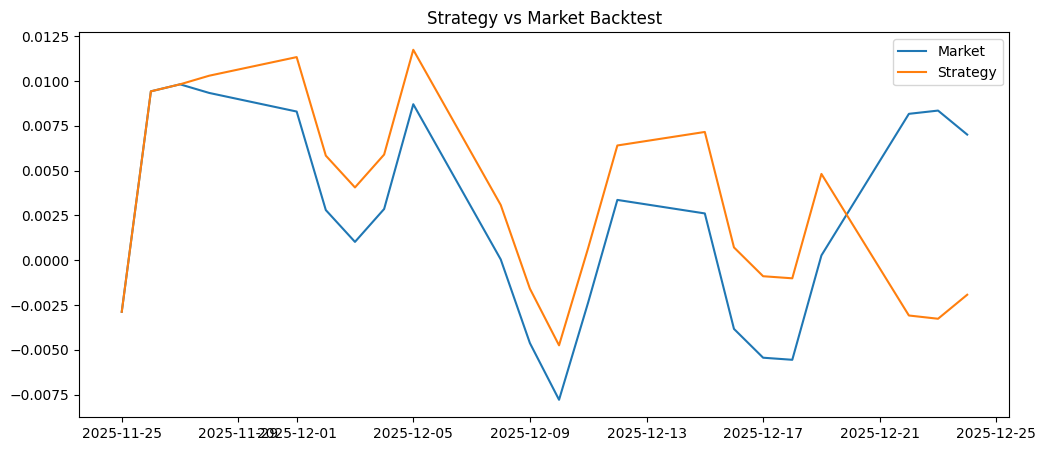

In [78]:
plt.figure(figsize=(12,5))
plt.plot(test_df.index,test_df["cum-market-return"],label="Market")
plt.plot(test_df.index,test_df["cum_strategy_return"],label="Strategy")
plt.title("Strategy vs Market Backtest")
plt.legend()
plt.show()